In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta
import talib 
from dateutil.relativedelta import relativedelta
from Tools import *
from Tools2 import *

In [6]:
start="2020-12-31"
end="2022-12-31"
name="PTPI"

#MACD619RSI21_8020
stock_data=pct_change(name,start,end)
#stock_data=data.get_data_yahoo(tickers=name,start=start,end=end,progress=False)
    
stock_data=MACD_short(stock_data)
stock_data=RSI(stock_data)
stock_data=RSI_MACD(stock_data,21,80,20)

#stock_data["log_vaolume"] = np.log(stock_data['Volume'])

stock_data = stock_data.dropna()
del stock_data["real_situation"]
y = np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)


In [7]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,Close_price_percentage,EMA6,EMA19,DIF,MACD,Position,RSI6,RSI14,RSI21
Date,,,,,,,,,,,,,,,
2021-02-02,35.500000,39.900002,35.000000,37.000000,37.000000,14450,0.072464,36.191163,39.265194,-3.074031,-2.591211,-1,46.421012,39.608530,36.842105
2021-02-03,36.799999,43.000000,36.700001,40.400002,40.400002,14430,0.091892,37.393688,39.378675,-1.984987,-2.469966,1,62.562367,49.658733,44.315548
2021-02-04,43.000000,52.000000,37.700001,41.099998,41.099998,136640,0.017327,38.452634,39.550807,-1.098173,-2.195607,1,65.155796,51.450119,45.704425
2021-02-05,41.200001,41.200001,36.299999,38.900002,38.900002,18890,-0.053528,38.580453,39.485727,-0.905273,-1.937541,1,51.659285,45.919511,42.228645
2021-02-08,38.900002,42.840000,38.900002,41.299999,41.299999,16320,0.061697,39.357466,39.667154,-0.309688,-1.611970,1,61.971420,51.983401,46.857897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,2.150000,2.150000,2.019000,2.080000,2.080000,9100,-0.052392,2.168021,2.716835,-0.548814,-0.653654,1,27.703567,24.994460,27.668010
2022-12-27,2.050000,2.230000,1.910000,2.033000,2.033000,25100,-0.022596,2.129444,2.648451,-0.519008,-0.626725,1,25.708066,24.392086,27.258615
2022-12-28,1.980000,2.110000,1.911000,2.070000,2.070000,40600,0.018200,2.112460,2.590606,-0.478146,-0.597009,1,30.441246,25.905975,28.137557


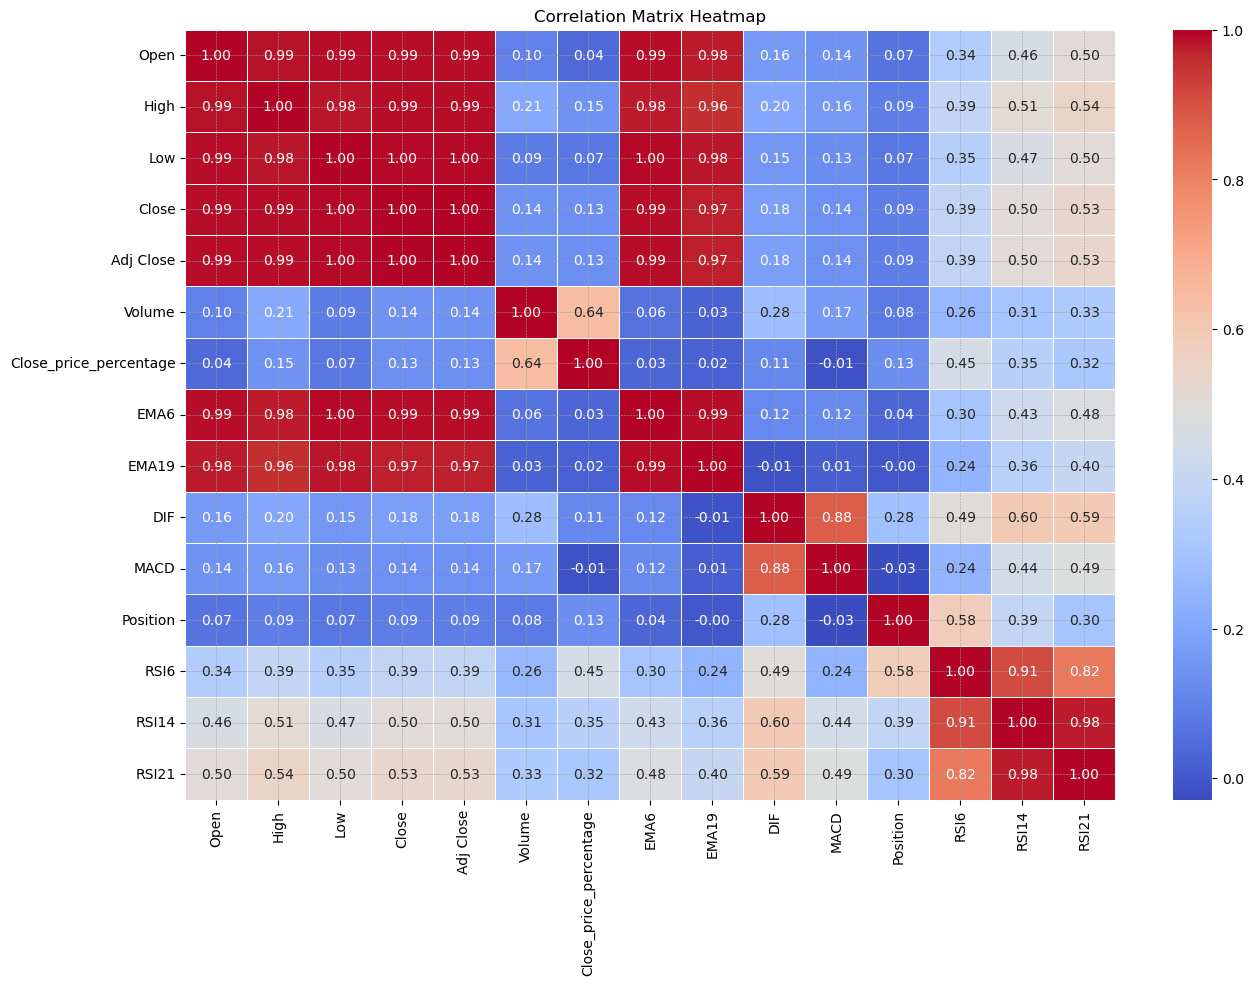

In [26]:
correlations=stock_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

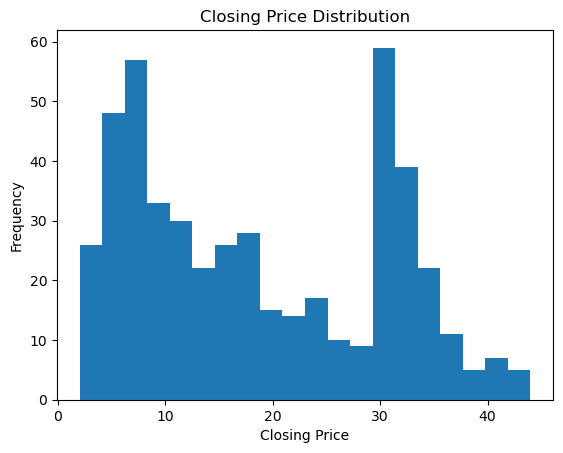

In [10]:
plt.hist(stock_data['Close'], bins=20)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Closing Price Distribution')
plt.show()

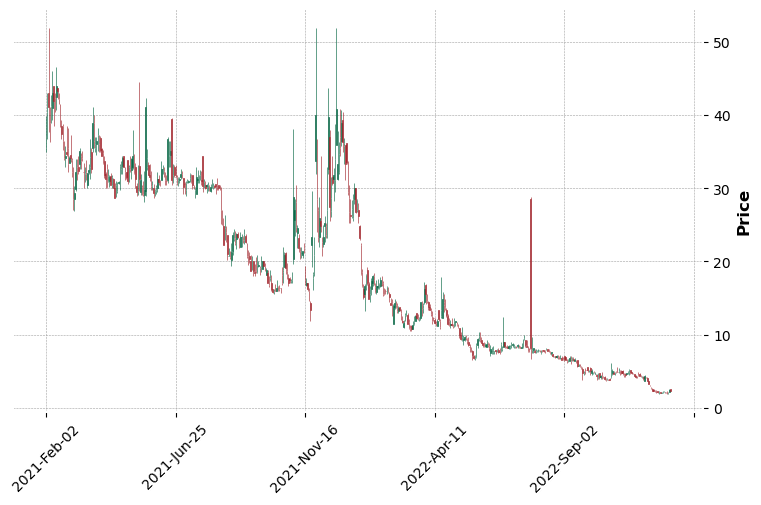

In [25]:
import mplfinance as mpf
PTPI=stock_data[['Open','High','Low','Close','Adj Close','Volume']]
mpf.plot(PTPI,type='candle',style='charles',figratio=(10,6))#,mav=(20,40))

<Axes: xlabel='Dates'>

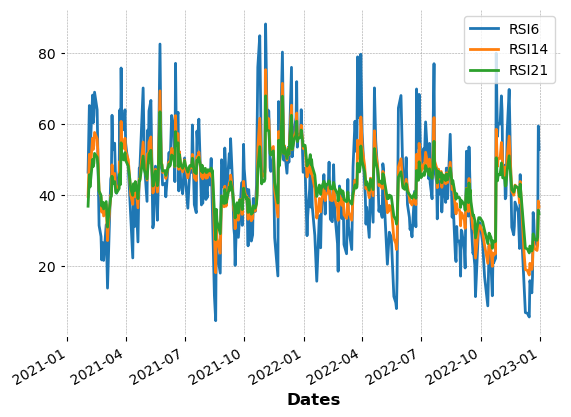

In [32]:
stock_data.loc[:,'Dates']=stock_data.index
stock_data
stock_data.plot(x='Dates',y=['RSI6','RSI14','RSI21'])

<Axes: xlabel='Dates'>

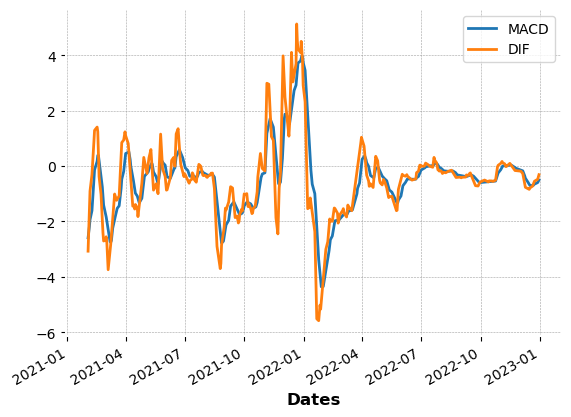

In [35]:
stock_data.plot(x='Dates',y=['MACD','DIF'])

<Axes: xlabel='Dates'>

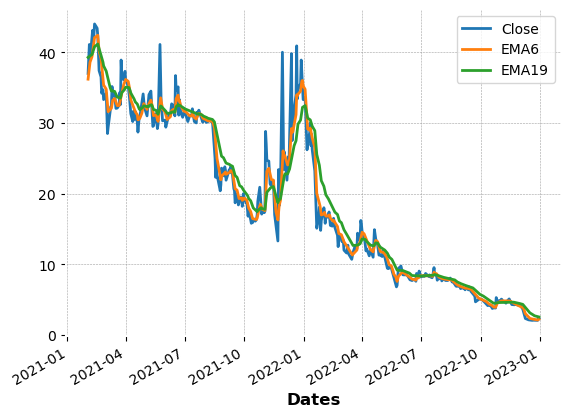

In [38]:
stock_data.plot(x='Dates',y=['Close','EMA6','EMA19'])